*8.4.2023*

<h1 style="background-color:orange;"></h1>

<h1 style='text-align: center;'> ColMex Team Datathon 2023 </h1>

<h3 style='text-align: center;'> <i>Streaming data made us decide to change from Software into Musical Instruments Category </i> </h3>

<h5 style='text-align: center;'> <i>Our data journey</i> </h5>


<h1 style="background-color:orange;"></h1>

<div style="background-color:LightGray;"><p style='text-align: center;'><align = center>Participants: <i>Jose Niño, Eduardo Avelar, Andres Ruiz, Rodrigo Quezada </i></p></div>  

***

# Streaming Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pyarrow

In [2]:
# Acronym as Musical Instruments Stream Reviews Data Set as misrds

file_name = '/Users/dslab/Downloads/stream_90223_raw_samples.parquet'
misrds = pd.read_parquet(file_name)
len(misrds)

90223

In [3]:
# Acronym as Main Cats as mc

md_file_name = '/Users/dslab/Downloads/metadata_main_cat.parquet'
mc = pd.read_parquet(md_file_name)
asins_mc = {k: v for k, v in mc.values}
len(mc)

14741571

In [4]:
misrds.head(1)

,asin,overall,reviewText,reviewerID,reviewerName,summary,verified,internal_partition,partition_number,style,vote,image
0,B00005QDPX,5.0,Crazy Taxi is by far one of the best video gam...,A36TDX8DY2XK5Q,Some Kid,It's Party Time! Let's Have Some Fun!,false,0,1,None,None,None


In [5]:
misrds.tail(1)

,asin,overall,reviewText,reviewerID,reviewerName,summary,verified,internal_partition,partition_number,style,vote,image
90222,B0170PELUM,2.0,"On the plus side, it looks fabulous. The disp...",AL1A6OFNOGJ2S,Daniel M. Horowitz,Looks great but accuracy is debatable,true,0,140080212,None,None,None


In [6]:
mc.head(1)

,asin,main_cat
0,B01FVYVI00,Tools & Home Improvement


In [7]:
def get_main_cat_count(df):
    mc = [{'asin': asin, 'main_cat': asins_mc.get(asin, '')} for asin in df['asin']]
    mcc = pd.DataFrame(mc).groupby('main_cat').count().to_dict()['asin']
    return mcc

In [8]:
misrds_count = get_main_cat_count(misrds)
main_cats = list(dict(sorted(misrds_count.items(), key=lambda x:x[1], reverse=True)).keys())
main_cats

['Musical Instruments',
 'Amazon Home',
 'Tools & Home Improvement',
 'Pet Supplies',
 'Sports & Outdoors',
 'Cell Phones & Accessories',
 'Software',
 'Home Audio & Theater',
 'Industrial & Scientific',
 'All Electronics',
 'Health & Personal Care',
 '',
 'Automotive',
 'Toys & Games',
 'Baby',
 'Books',
 'Grocery',
 'Computers',
 'Car Electronics',
 'Video Games',
 'Camera & Photo',
 'All Beauty',
 'Office Products',
 'Arts, Crafts & Sewing',
 'Amazon Fashion']

Unique stream reviews

In [9]:
misrds.shape

(90223, 12)

In [10]:
duplicates = misrds[misrds.duplicated()]

# Number of duplicated rows

duplicates.shape

(10001, 12)

#### Unique stream reviews

In [11]:
#df_unique_stream_reviews = df_stream_reviews.drop_duplicates()
#unique_stream_review_cat_count = get_main_cat_count(df_unique_stream_reviews)
#len(df_unique_stream_reviews)

misrds.drop_duplicates(keep='first', inplace=True)
misrds.shape

(80222, 12)

In [12]:
# Reviews data set comparison

misrds['asin'].isin(mc['asin']).value_counts()

True    80222
Name: asin, dtype: int64

In [13]:
# Reviews data set comparison

mc['asin'].isin(misrds['asin']).value_counts()

False    14733994
True         7577
Name: asin, dtype: int64

In [14]:
# Using acronym Streaming One Data Set as sods

sods = pd.merge(misrds, mc, how='inner', on='asin')

# Making sure all rows of Reviews are still at data set

sods.shape

(80222, 13)

In [15]:
sods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80222 entries, 0 to 80221
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   asin                80222 non-null  object
 1   overall             80222 non-null  object
 2   reviewText          80163 non-null  object
 3   reviewerID          80222 non-null  object
 4   reviewerName        80220 non-null  object
 5   summary             80206 non-null  object
 6   verified            80222 non-null  object
 7   internal_partition  80222 non-null  object
 8   partition_number    80222 non-null  int64 
 9   style               29802 non-null  object
 10  vote                12594 non-null  object
 11  image               2327 non-null   object
 12  main_cat            80222 non-null  object
dtypes: int64(1), object(12)
memory usage: 8.6+ MB


In [16]:
sods.columns

Index(['asin', 'overall', 'reviewText', 'reviewerID', 'reviewerName',
       'summary', 'verified', 'internal_partition', 'partition_number',
       'style', 'vote', 'image', 'main_cat'],
      dtype='object')

In [17]:
# Remove columns not needed

sods.drop(['style', 'vote', 'image'], axis = 1, inplace = True)
sods.head(1)

,asin,overall,reviewText,reviewerID,reviewerName,summary,verified,internal_partition,partition_number,main_cat
0,B00005QDPX,5.0,Crazy Taxi is by far one of the best video gam...,A36TDX8DY2XK5Q,Some Kid,It's Party Time! Let's Have Some Fun!,false,0,1,Video Games


In [18]:
# We now add a feature engineering column for reference for counting called "cnt" with a constant

sods['cnt'] = pd.Series([1 for x in range(len(sods.index))])
sods.head(1)

,asin,overall,reviewText,reviewerID,reviewerName,summary,verified,internal_partition,partition_number,main_cat,cnt
0,B00005QDPX,5.0,Crazy Taxi is by far one of the best video gam...,A36TDX8DY2XK5Q,Some Kid,It's Party Time! Let's Have Some Fun!,false,0,1,Video Games,1


In [19]:
sods['main_cat'].value_counts()

Musical Instruments          38487
Amazon Home                  36863
Tools & Home Improvement      1339
Pet Supplies                   801
Sports & Outdoors              431
Software                       372
Home Audio & Theater           289
Industrial & Scientific        233
All Electronics                204
Health & Personal Care         204
Cell Phones & Accessories      204
                               187
Toys & Games                   103
Automotive                      86
Computers                       74
Car Electronics                 64
Baby                            64
Grocery                         47
Books                           43
Video Games                     41
Camera & Photo                  30
Office Products                 21
All Beauty                      16
Arts, Crafts & Sewing           15
Amazon Fashion                   4
Name: main_cat, dtype: int64

In [20]:
sods.head(1)

,asin,overall,reviewText,reviewerID,reviewerName,summary,verified,internal_partition,partition_number,main_cat,cnt
0,B00005QDPX,5.0,Crazy Taxi is by far one of the best video gam...,A36TDX8DY2XK5Q,Some Kid,It's Party Time! Let's Have Some Fun!,false,0,1,Video Games,1


In [21]:
# Grouping top 10 values as acronym for Ten Categories Stream data set is tcs

tcs = sods[sods["main_cat"].isin(['Musical Instruments', 'Amazon Home', 'Tools & Home Improvement', 'Pet Supplies', 'Sports & Outdoors', 'Software', 'Home Audio & Theater', 'Industrial & Scientific',' All Electronics', 'Health & Personal Care'])]
tcs.shape

(79019, 11)

In [22]:
tcs.head(1)

,asin,overall,reviewText,reviewerID,reviewerName,summary,verified,internal_partition,partition_number,main_cat,cnt
9,B015P3XKWG,5.0,"received order fast, and product seems to work...",AT7AI63PHH6FN,Danny Peradotto,product seems to work great and exactly what w...,true,0,140000000,Amazon Home,1


In [23]:
# Grouping by category for a subset data set as Main Cat Count

mcc = tcs.groupby(['main_cat'], as_index=False)['cnt'].sum()
mcc = mcc.sort_values(by=["cnt"], ascending = False)
mcc.reset_index(inplace = True, drop = True)
mcc.head(10)

,main_cat,cnt
0,Musical Instruments,38487
1,Amazon Home,36863
2,Tools & Home Improvement,1339
3,Pet Supplies,801
4,Sports & Outdoors,431
5,Software,372
6,Home Audio & Theater,289
7,Industrial & Scientific,233
8,Health & Personal Care,204


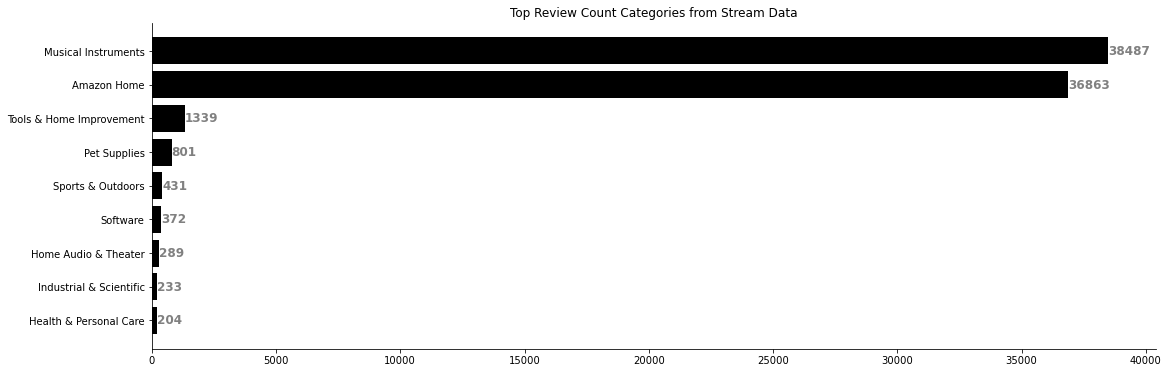

In [24]:
# Figure Size
fig, ax = plt.subplots(figsize =(18, 6))
 
# Horizontal Bar Plot
ax.barh(mcc['main_cat'], mcc['cnt'], color ='black')
 
# Remove axes splines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
 
# Show top to bottom order
ax.invert_yaxis()
 
# Show values at each column
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize = 12, fontweight ='bold',color ='gray')
 
# Title
ax.set_title('Top Review Count Categories from Stream Data')
 
# Display Plot
plt.show()

In [25]:
# Making the data set for streaming data related to Musical Instruments only as Streaming Musical Instruments so smi

smi = tcs[tcs["main_cat"].isin(['Musical Instruments'])]
smi.shape

(38487, 11)

In [26]:
smi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38487 entries, 18 to 80221
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   asin                38487 non-null  object
 1   overall             38487 non-null  object
 2   reviewText          38460 non-null  object
 3   reviewerID          38487 non-null  object
 4   reviewerName        38487 non-null  object
 5   summary             38478 non-null  object
 6   verified            38487 non-null  object
 7   internal_partition  38487 non-null  object
 8   partition_number    38487 non-null  int64 
 9   main_cat            38487 non-null  object
 10  cnt                 38487 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 3.5+ MB


In [27]:
smi['asin'].value_counts()

B0002H05BA    10
B000B6DHFI    10
B000B6IUBE    10
B0002IL4TG    10
B0002IHUS0    10
              ..
B0002VR9HY     1
B0009V3HXM     1
B0002GWRR6     1
B0002VRP5K     1
B0002EB5P8     1
Name: asin, Length: 6471, dtype: int64

In [28]:
smi['asin'].describe()

count          38487
unique          6471
top       B0002H05BA
freq              10
Name: asin, dtype: object

## Checkpoint

In [29]:
# Loading the merged and clean Musical Category dataset

smi.to_parquet('final_music_streaming_data_842023_PM.parquet')